In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("D:\python\Bike sharing\day.csv")

In [3]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [5]:
df.shape

(730, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [15]:
df["season"].unique()

array([1, 2, 3, 4], dtype=int64)

In [19]:
df["season"]= df["season"].replace(1,"spring")

In [20]:
df["season"].unique()

array(['spring', 2, 3, 4], dtype=object)

In [26]:
df.loc[(df["season"]==2),"season"]="summer"

In [27]:
df["season"].unique()

array(['spring', 'summer', 3, 4], dtype=object)

In [28]:
df.loc[(df["season"]==3),"season"]="fall"

In [29]:
df.loc[(df["season"]==4),"season"]="winter"

In [30]:
df["season"].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [31]:
df["yr"].value_counts()

1    365
0    365
Name: yr, dtype: int64

In [33]:
def object_map(x):
    return x.map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"June",7:"July",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})

In [34]:
df[["mnth"]]=df[["mnth"]].apply(object_map)

In [35]:
df["mnth"].value_counts()

May     62
Oct     62
Mar     62
Jan     62
Dec     62
Aug     62
July    62
June    60
Sep     60
Apr     60
Nov     60
Feb     56
Name: mnth, dtype: int64

In [36]:
df["holiday"].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [37]:
df["weekday"].value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

In [39]:
df["weekday"].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [43]:
def str_map(x):
    return x.map({1:"wed",2:"thur",3:"fri",4:"sat",5:"sun",6:"mon",0:"tues"})

In [44]:
df[["weekday"]]=df[["weekday"]].apply(str_map)

In [45]:
df["weekday"].value_counts()

mon     105
tues    105
wed     105
thur    104
sat     104
sun     104
fri     103
Name: weekday, dtype: int64

In [46]:
df["workingday"].value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [47]:
df["weathersit"].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [48]:
df["weathersit"].unique()

array([2, 1, 3], dtype=int64)

In [50]:
df.loc[(df["weathersit"]==1),"weathersit"]="A"
df.loc[(df["weathersit"]==2),"weathersit"]="B"
df.loc[(df["weathersit"]==3),"weathersit"]="C"
df.loc[(df["weathersit"]==4),"weathersit"]="D"

In [51]:
df["weathersit"].value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


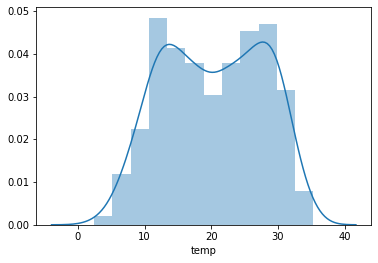

In [54]:
sns.distplot(df["temp"])
plt.show()

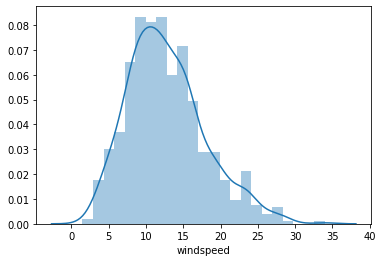

In [55]:
sns.distplot(df["windspeed"])
plt.show()

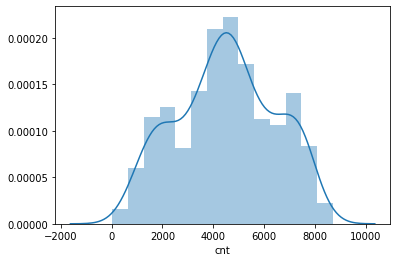

In [56]:
sns.distplot(df["cnt"])
plt.show()

In [57]:
df["dteday"]=pd.to_datetime(df["dteday"])

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null datetime64[ns]
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(7), object(4)
memory usage: 91.4+ KB


In [59]:
df_categorical=df.select_dtypes("object")

In [60]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 4 columns):
season        730 non-null object
mnth          730 non-null object
weekday       730 non-null object
weathersit    730 non-null object
dtypes: object(4)
memory usage: 22.9+ KB


In [61]:
df_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,mon,B
1,spring,Jan,tues,B
2,spring,Jan,wed,A
3,spring,Jan,thur,A
4,spring,Jan,fri,A
...,...,...,...,...
725,spring,Dec,sat,B
726,spring,Dec,sun,B
727,spring,Dec,mon,B
728,spring,Dec,tues,A


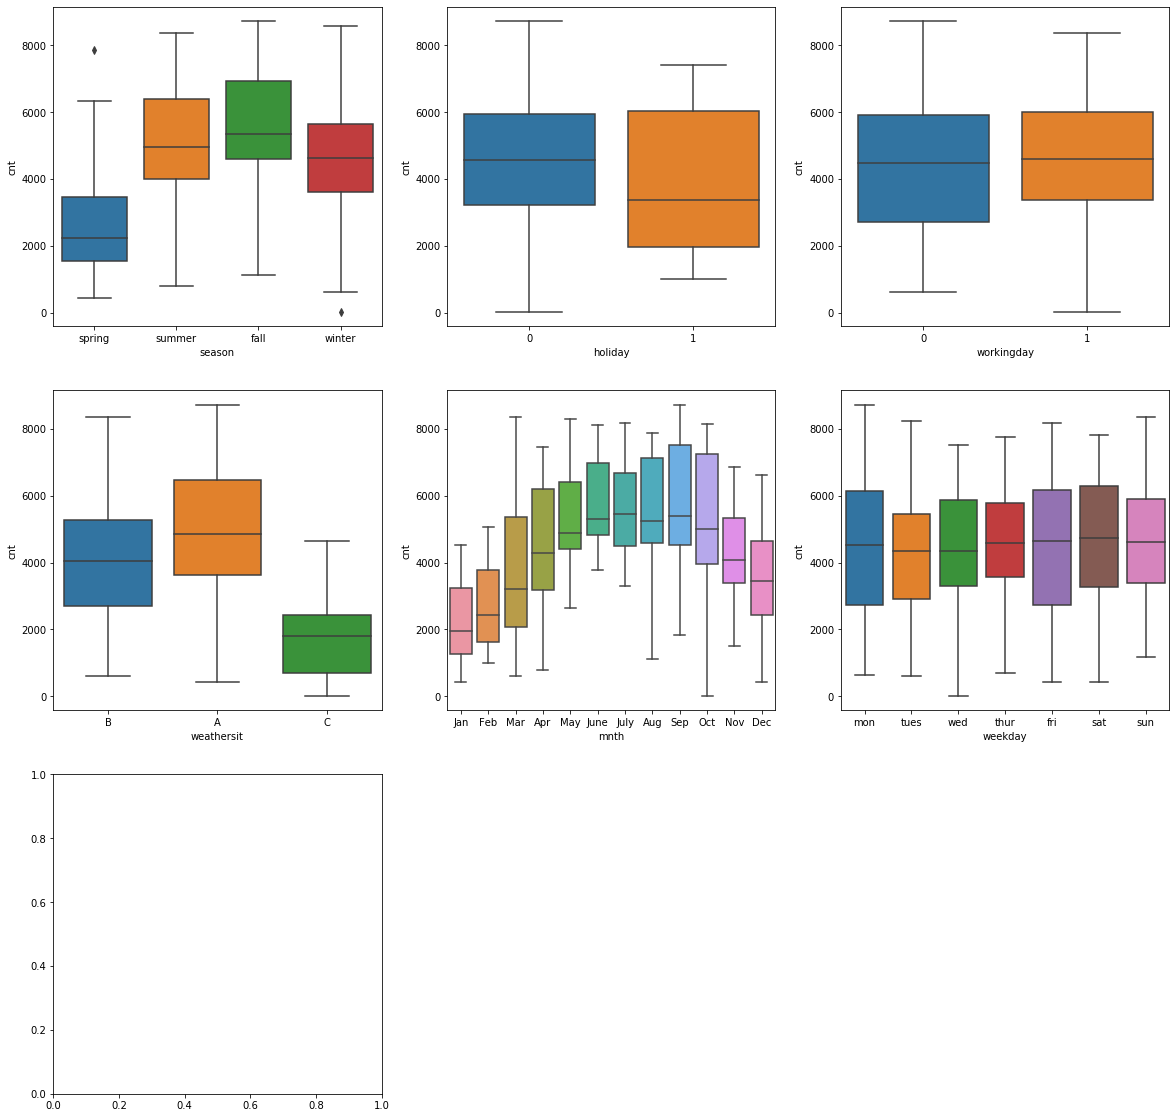

In [69]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x=df["season"],y=df["cnt"])
plt.subplot(3,3,2)
sns.boxplot(x="holiday",y="cnt",data=df)
plt.subplot(3,3,3)
sns.boxplot(x="workingday",y="cnt",data=df)
plt.subplot(3,3,4)
sns.boxplot(x="weathersit",y="cnt",data=df)
plt.subplot(3,3,5)
sns.boxplot(x="mnth",y="cnt",data=df)
plt.subplot(3,3,6)
sns.boxplot(x="weekday",y="cnt",data=df)
plt.subplot(3,3,7)
plt.show()




In [88]:
df_numeric= df.select_dtypes(include=["float64","int64"])

In [89]:
df_numeric.columns

Index(['instant', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

In [90]:
df_numeric= df_numeric.drop(['instant','yr', 'holiday', 'workingday'],axis=1)

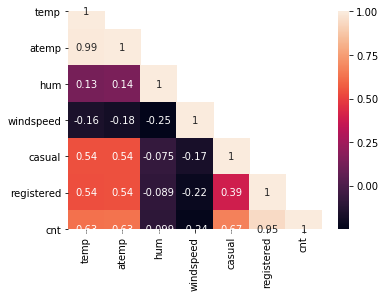

In [91]:
mask= np.array(df_numeric.corr())
mask[np.tril_indices_from(mask)]=False
sns.heatmap(df_numeric.corr(),mask=mask,annot=True,square=True)
plt.show()

In [92]:
df_numeric.drop(["atemp"],axis=1,inplace=True)

In [94]:
mask

array([[ 0.        ,  0.99169618,  0.12856468, -0.15818638,  0.54273144,
         0.53943622,  0.62704403],
       [ 0.        ,  0.        ,  0.14151172, -0.1838764 ,  0.54336235,
         0.54367823,  0.63068535],
       [ 0.        ,  0.        ,  0.        , -0.24850587, -0.07521137,
        -0.08921192, -0.09854288],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.16799534,
        -0.21791436, -0.2351325 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.39413716,  0.67212341],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.94541061],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]])

In [93]:
np.tril_indices_from(np.array([[
    1,0
],[
    0,1
]]))

(array([0, 1, 1], dtype=int64), array([0, 0, 1], dtype=int64))

In [95]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 6 columns):
temp          730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(3), int64(3)
memory usage: 34.3 KB


In [97]:
df_dummies= pd.get_dummies(df_categorical,drop_first=True)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null datetime64[ns]
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(7), object(4)
memory usage: 91.4+ KB


In [101]:
df= df.drop(list(df_categorical.columns),axis=1)

In [102]:
df= pd.concat([df,df_dummies],axis=1)

In [103]:
df.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tues,weekday_wed,weathersit_B,weathersit_C
0,1,2018-01-01,0,0,0,14.110847,18.18125,80.5833,10.749882,331,...,0,0,1,0,0,0,0,0,1,0
1,2,2018-02-01,0,0,0,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,0,0,1,0,1,0
2,3,2018-03-01,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,0,0,0,1,0,0
3,4,2018-04-01,0,0,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,1,0,0,0,0
4,5,2018-05-01,0,0,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,0,0,0,0


In [104]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
instant          730 non-null int64
dteday           730 non-null datetime64[ns]
yr               730 non-null int64
holiday          730 non-null int64
workingday       730 non-null int64
temp             730 non-null float64
atemp            730 non-null float64
hum              730 non-null float64
windspeed        730 non-null float64
casual           730 non-null int64
registered       730 non-null int64
cnt              730 non-null int64
season_spring    730 non-null uint8
season_summer    730 non-null uint8
season_winter    730 non-null uint8
mnth_Aug         730 non-null uint8
mnth_Dec         730 non-null uint8
mnth_Feb         730 non-null uint8
mnth_Jan         730 non-null uint8
mnth_July        730 non-null uint8
mnth_June        730 non-null uint8
mnth_Mar         730 non-null uint8
mnth_May         730 non-null uint8
mnth_Nov         730 non-null uint8
mnth_Oct      

In [106]:
df.drop(["dteday"],axis=1,inplace=True)

In [107]:
df.head()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tues,weekday_wed,weathersit_B,weathersit_C
0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,1,0,0,0,0,0,1,0
1,2,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,0,0,0,0,1,0,1,0
2,3,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,0,0,0,0,0,1,0,0
3,4,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,0,0,0,1,0,0,0,0
4,5,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,0,0,0,0


In [108]:
X=df.drop("cnt",axis=1)
y=df["cnt"]

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=100)

In [111]:
from sklearn.preprocessing import MinMaxScaler

In [113]:
scaler= MinMaxScaler()

In [117]:
X_train[["temp","hum","windspeed","casual","registered"]]=scaler.fit_transform(X_train[["temp","hum","windspeed","casual","registered"]])

C:\Users\kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\kumar\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [118]:
X_test[["temp","hum","windspeed","casual","registered"]]=scaler.fit_transform(X_test[["temp","hum","windspeed","casual","registered"]])

C:\Users\kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\kumar\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [119]:
from sklearn.ensemble import GradientBoostingRegressor

In [121]:
model= GradientBoostingRegressor()

In [122]:
model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [123]:
model.score(X_test,y_test)

0.9816153892462329

In [124]:
model.score(X_train,y_train)

0.9990695710988964